In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 6.1 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -10
MAX_VALUE = 10
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np

def sumXExp2(x):
  sumX = 0  
  for value in x:
    sumX += np.power(value, 2)
  return sumX

def sumSinExp2Modx(x):
  sumX = 0
  for value in x:
    sumX += pow(np.sin(np.sqrt(abs(value))),2)
  return sumX

def term1Left(x):
  sum = 0
  for value in x:
    sum += pow(np.sin(value),2) - np.exp(-(sumXExp2(x)))
  return sum

def xinSheYangN4(x):
  value = term1Left(x) * np.exp(-(sumSinExp2Modx(x)))
  return (value,)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", xinSheYangN4)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg      	std      	min       	max     
0  	30    	0.0561296	0.0558197	0.00537385	0.188441
1  	180   	0.0160854	0.0155839	0.0033222 	0.0837771
2  	186   	0.00769675	0.00499497	0.00179668	0.0223652
3  	184   	0.00401937	0.00160946	0.00146076	0.00842675
4  	186   	0.00247919	0.000902028	0.000987474	0.00476931
5  	185   	0.00192914	0.000656899	0.000960491	0.0032429 
6  	177   	0.00123295	0.000455276	0.000456004	0.00257382
7  	183   	0.000888882	0.000287996	0.00030039 	0.00152658
8  	178   	0.000603956	0.000138439	0.00030039 	0.000980109
9  	188   	0.000457354	9.47645e-05	0.00030039 	0.000623494
10 	172   	0.000382111	7.90995e-05	0.000257136	0.000602001
11 	180   	0.000290157	4.01359e-05	0.000232057	0.000422404
12 	178   	0.000245296	3.6886e-05 	0.000160915	0.000334968
13 	179   	0.000210283	3.38585e-05	0.000150171	0.000268907
14 	181   	0.000179058	3.06876e-05	0.000125406	0.000223832
15 	184   	0.000156812	1.96274e-05	0.000125406	0.000217908
16 	174   	0.000145645	1.12452e-05	0

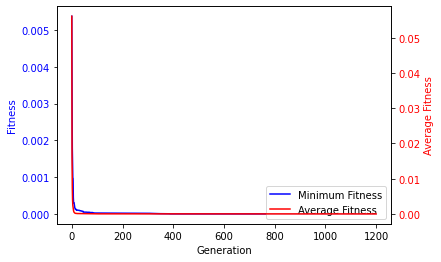

gen	nevals	avg      	std      	min       	max     
0  	30    	0.0459846	0.0757464	0.00242183	0.408405
1  	179   	0.0119963	0.0157323	0.00212355	0.0845479
2  	184   	0.00454826	0.00357619	0.00212355	0.0181738
3  	176   	0.00229437	0.000754027	0.00121481	0.00489211
4  	185   	0.0017637 	0.000602467	0.00073931	0.00370389
5  	182   	0.00111602	0.000407423	0.00065739	0.00212355
6  	182   	0.000757719	0.000135148	0.000479033	0.00100098
7  	186   	0.000617935	0.000121847	0.000395057	0.000778734
8  	183   	0.000553266	0.000111768	0.000358081	0.00075802 
9  	179   	0.000458424	7.36281e-05	0.00035635 	0.00065739 
10 	180   	0.000404438	3.89751e-05	0.00035635 	0.000510538
11 	183   	0.000371642	2.47715e-05	0.000340552	0.000437181
12 	185   	0.000348811	2.35919e-05	0.000276931	0.000413582
13 	180   	0.000323835	2.35347e-05	0.000276931	0.00035635 
14 	178   	0.000300502	2.94911e-05	0.000247638	0.000350491
15 	182   	0.000276531	3.05978e-05	0.000247638	0.000320997
16 	182   	0.000249373	1.06096e-05	

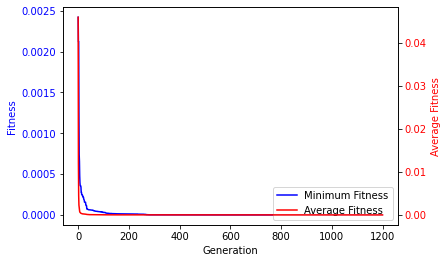

gen	nevals	avg     	std      	min       	max     
0  	30    	0.075381	0.0969973	0.00494022	0.422831
1  	183   	0.0223944	0.025102 	0.00304613	0.127217
2  	173   	0.00551182	0.00321184	0.00304613	0.0176337
3  	173   	0.00322134	0.00119975	0.00120398	0.00851485
4  	183   	0.00249002	0.000588715	0.00143277	0.00329965
5  	184   	0.00183861	0.000570419	0.00086035	0.00291113
6  	183   	0.00110958	0.00043816 	0.00049721	0.00235443
7  	179   	0.000754036	0.000241407	0.000265853	0.00135453
8  	180   	0.000542703	0.000219072	0.000188735	0.000924839
9  	182   	0.000340552	0.000135247	0.000149205	0.000701048
10 	180   	0.000233439	7.35273e-05	0.000149205	0.000477779
11 	187   	0.000190878	2.19075e-05	0.000139795	0.000261703
12 	181   	0.000182146	1.42824e-05	0.000149205	0.000200535
13 	182   	0.000166823	2.16557e-05	0.000109996	0.000188735
14 	176   	0.000142555	2.19296e-05	0.000109996	0.000179427
15 	175   	0.000123521	1.75656e-05	0.000107272	0.00016555 
16 	179   	0.000110418	4.20663e-06	0.00010

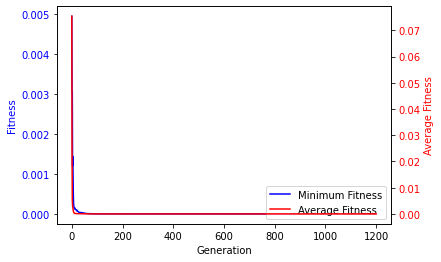

gen	nevals	avg      	std     	min       	max    
0  	30    	0.0674103	0.102479	0.00170837	0.43267
1  	174   	0.0128514	0.00601847	0.00170837	0.0229391
2  	171   	0.00697369	0.00407807	0.00176091	0.0193103
3  	187   	0.00397893	0.00243303	0.000827209	0.0135323
4  	184   	0.00200409	0.000796878	0.000760311	0.00350812
5  	184   	0.00123022	0.000579821	0.000260387	0.00312929
6  	182   	0.000767394	0.000282054	0.000276298	0.00146116
7  	175   	0.000560525	0.000193987	0.000235156	0.000975693
8  	177   	0.000390385	0.000139083	0.000172208	0.000745664
9  	173   	0.000269607	6.21383e-05	0.000182691	0.000412464
10 	175   	0.000212273	2.93248e-05	0.000121255	0.000262431
11 	178   	0.000176957	3.6541e-05 	0.000112956	0.000240772
12 	185   	0.000134144	3.23628e-05	7.33155e-05	0.000197227
13 	173   	0.000103753	1.84822e-05	7.33155e-05	0.000134351
14 	180   	8.6343e-05 	1.03281e-05	7.33155e-05	0.000116649
15 	183   	7.83933e-05	5.52672e-06	7.33155e-05	8.87686e-05
16 	185   	7.43925e-05	3.03187e-06	7.

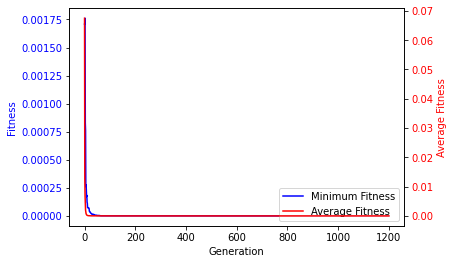

gen	nevals	avg      	std      	min      	max     
0  	30    	0.0345575	0.0380181	0.0047025	0.190308
1  	182   	0.0153217	0.00994233	0.0025691	0.0360472
2  	173   	0.00677626	0.00446396	0.00117159	0.0165592
3  	179   	0.00347735	0.0014438 	0.00117159	0.00625962
4  	180   	0.00219383	0.000966036	0.000613823	0.00443066
5  	184   	0.00149722	0.000738545	0.000481657	0.00305386
6  	176   	0.000705288	0.000234964	0.000383326	0.00136896
7  	181   	0.000495306	0.000156683	0.000244049	0.00101267
8  	174   	0.000367915	0.000105315	0.000246356	0.000667296
9  	172   	0.000290419	6.81518e-05	0.00019218 	0.000496116
10 	190   	0.000237852	2.91617e-05	0.000161451	0.000299512
11 	182   	0.000203774	2.57875e-05	0.000161451	0.000248066
12 	189   	0.000179919	2.31672e-05	0.000130391	0.000242461
13 	179   	0.000156075	1.83006e-05	0.0001162  	0.000192072
14 	180   	0.000140333	2.3778e-05 	0.000102546	0.000191745
15 	183   	0.000116289	1.53989e-05	0.000101308	0.000161446
16 	184   	0.000105623	7.77644e-06	0.

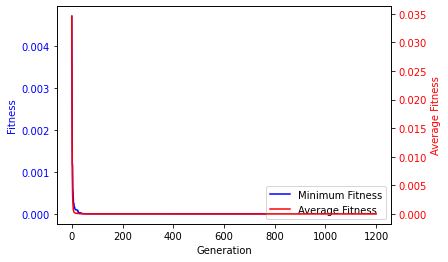

In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()